In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Main function
def F(x):
    return 0.1025*(x**3) - 0.015*np.sin(0.35)*(x**2) + np.log(1.28)*(x) - np.tanh(25.19)

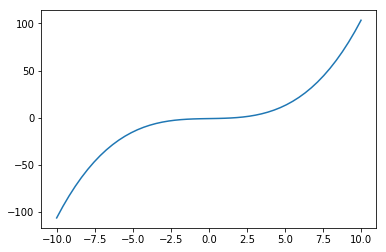

In [3]:
#Make a graph
x = np.linspace(-10, 10, 50)
plt.plot(x, F(x))

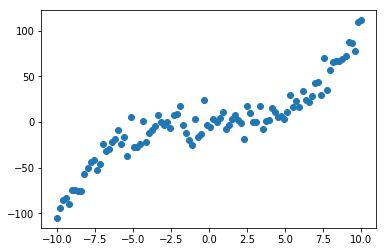

In [114]:
#Generating our data
np.random.seed(228)
x = np.linspace(-10, 10, 100)
np.random.shuffle(x)
y = F(x) + 10*np.random.randn(100)
y[1], x[1]
plt.scatter(x, y)

In [115]:
#Model
model = LinearRegression()
model.fit_intercept()

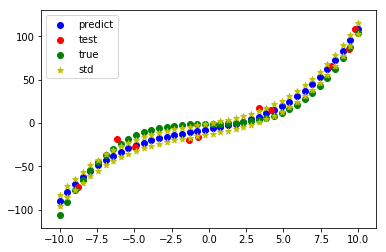

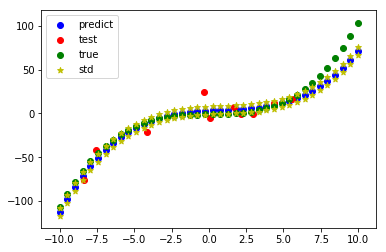

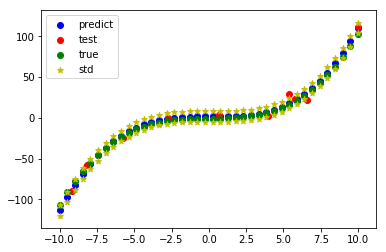

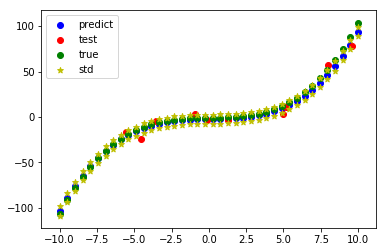

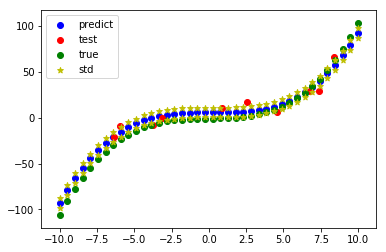

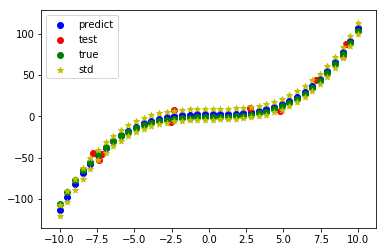

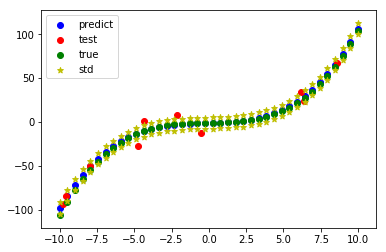

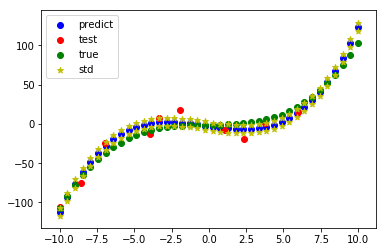

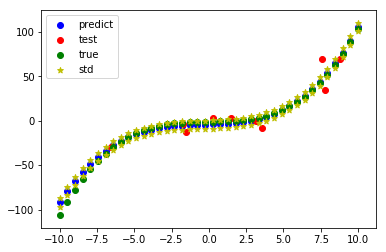

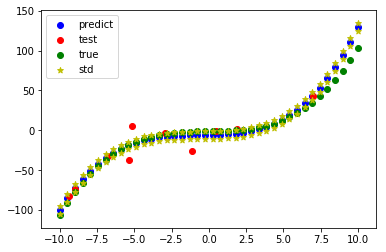

In [137]:
#Loop
n = 10
test = np.array(np.linspace(-10, 10, 40))
xarr = []
yarr = []
pr = lambda x: np.array([x**3, x**2, x, 1]) 
k = 1
for data, label in zip(x, y):
    xarr.append(pr(data))
    yarr.append(label)
    if len(yarr) == n:
        model.fit(xarr, yarr)
        xtmp = np.array(xarr).T[2]
        std = xtmp.std()
        tmp = np.array([pr(g) for g in test])
        k += 1
        #Drawing...
        plt.scatter(test, model.predict(tmp), c="b")
        plt.scatter(xtmp, yarr, c='r')
        plt.scatter(test, F(test), c='g')
        plt.scatter(test, model.predict(tmp) + std, marker="*", c='y')
        plt.scatter(test, model.predict(tmp) - std, marker="*", c='y')
        plt.legend(['predict', 'test', 'true', 'std'] )
        plt.savefig(f'figure_{k}.jpg', dpi=300)
        plt.show()
        xarr = []
        yarr = []